<a href="https://colab.research.google.com/github/Sebastian210102/TelecomX/blob/main/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Telecom X

Telecom X es una empresa de telecomunicaciones y has sido contratado como analista de datos para trabajar en un proyecto específico de Churn de clientes. La empresa está enfrentando un alto índice de evasión de clientes y aún no han identificado el problema de esta evasión. Para ello, te han proporcionado algunos datos en los que tendrás que buscar, tratar y realizar un análisis exploratorio para, una vez limpiados estos datos, poder proporcionárselos al equipo de ciencia de datos. De esta manera, podrán realizar un análisis predictivo y determinar de dónde proviene esta evasión de clientes.

### Importación de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Extracción de Datos (E - Extract)

In [2]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
df_clientes = pd.read_json(url)

In [3]:
df_clientes.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## Transformación (T - Transform )

In [4]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [5]:
df_clientes.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [6]:
columnas = list(df_clientes.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [7]:
datos_customer = pd.json_normalize(df_clientes['customer'])
datos_customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [8]:
datos_phone = pd.json_normalize(df_clientes['phone'])
datos_phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [9]:
datos_internet = pd.json_normalize(df_clientes['internet'])
datos_internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [10]:
datos_account = pd.json_normalize(df_clientes['account'])
datos_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [11]:
columnas_customer = list(datos_customer.columns)
columnas_customer

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure']

In [12]:
df_clientes = df_clientes.drop(columns=['customer', 'phone', 'internet', 'account'])

In [13]:
df_clientes

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes
...,...,...
7262,9987-LUTYD,No
7263,9992-RRAMN,Yes
7264,9992-UJOEL,No
7265,9993-LHIEB,No


In [14]:
df_clientes = pd.concat([df_clientes, datos_customer, datos_phone, datos_internet, datos_account], axis=1)

In [15]:
df_clientes

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65



#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente





### Verificación de valores nulos

In [16]:
df_clientes.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


### Buscando duplicados

In [17]:
df_clientes.duplicated().sum()

np.int64(0)

Al parecer no hay valores nulos

### Tratando de encontrar valores incosistentes

In [18]:
# Revisión de valores únicos para una columna categórica
df_clientes['gender'].unique()

# Contar frecuencia de cada categoría
df_clientes['gender'].value_counts()

df_clientes["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [19]:
df_clientes.Churn.unique()

array(['No', 'Yes', ''], dtype=object)

Tratando la inconsidencia del churn vacio

In [20]:
df_churn_vacio = df_clientes[df_clientes['Churn'] == '']
df_churn_vacio

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [21]:
df_clientes.drop(df_churn_vacio.index, inplace=True)

In [22]:
df_clientes.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [23]:
for col in df_clientes.columns:
    print(col)
    print(df_clientes[col].unique())

customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn
['No' 'Yes']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['Yes' 'No']
tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
PhoneService
['Yes' 'No']
MultipleLines
['No' 'Yes' 'No phone service']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['Yes' 'No' 'No internet service']
StreamingTV
['Yes' 'No' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['One year' 'Month-to-month' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'

In [24]:
df_clientes.columns = df_clientes.columns.str.replace('.', '_')

In [25]:
df_clientes

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [26]:
df_clientes["Cuentas_diarias"] = df_clientes["Charges_Monthly"] / 30
df_clientes

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [27]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [28]:
cols = ['Charges_Monthly', 'Charges_Total', 'Cuentas_diarias']

for col in cols:
    # ‑‑ 1) quita espacios en blanco y reemplaza cadenas vacías por NaN
    df_clientes[col] = (
        df_clientes[col]
        .astype(str)                 # convierte a string temporalmente
        .str.strip()                 # elimina espacios iniciales/finales
        .replace(r'^\s*$', np.nan, regex=True)  # cadenas vacías → NaN
    )


df_clientes['Charges_Monthly'] = df_clientes['Charges_Monthly'].astype(np.float16)
df_clientes['Charges_Total'] = df_clientes['Charges_Total'].astype(np.float16)
df_clientes['Cuentas_diarias'] = df_clientes['Cuentas_diarias'].astype(np.float16)
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [29]:
df_clientes

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.62500,593.50,2.187500
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90625,542.50,1.997070
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.87500,280.75,2.462891
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00000,1238.00,3.267578
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.87500,267.50,2.796875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15625,743.00,1.837891
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.12500,1874.00,2.835938
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.31250,92.75,1.676758
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.87500,4628.00,2.261719


In [30]:
columnas = df_clientes.columns
columnas


Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total',
       'Cuentas_diarias'],
      dtype='object')

### Cambiando todos los no y si por 0 y 1

In [31]:
for col in columnas:
    df_clientes[col].replace({"No": 0, "Yes": 1}, inplace=True)

df_clientes

/tmp/ipython-input-31-464339644.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clientes[col].replace({"No": 0, "Yes": 1}, inplace=True)
/tmp/ipython-input-31-464339644.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clientes[col].replace({"No": 0, "Yes": 1}, inplace=True)
/usr/local/l

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.62500,593.50,2.187500
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90625,542.50,1.997070
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.87500,280.75,2.462891
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00000,1238.00,3.267578
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.87500,267.50,2.796875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15625,743.00,1.837891
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.12500,1874.00,2.835938
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.31250,92.75,1.676758
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.87500,4628.00,2.261719


## Carga y análisis (L - Load and Analysis)

In [32]:
# Resumen estadístico completo
df_clientes.describe().T


/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1025: RuntimeWarning: overflow encountered in cast
  result = result.astype(dtype, copy=False)


,count,mean,std,min,25%,50%,75%,max
Churn,7043.0,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.000000
SeniorCitizen,7043.0,0.162147,0.368612,0.000000,0.000000,0.000000,0.000000,1.000000
Partner,7043.0,0.483033,0.499748,0.000000,0.000000,0.000000,1.000000,1.000000
Dependents,7043.0,0.299588,0.458110,0.000000,0.000000,0.000000,1.000000,1.000000
tenure,7043.0,32.371149,24.559481,0.000000,9.000000,29.000000,55.000000,72.000000
PhoneService,7043.0,0.903166,0.295752,0.000000,1.000000,1.000000,1.000000,1.000000
PaperlessBilling,7043.0,0.592219,0.491457,0.000000,0.000000,1.000000,1.000000,1.000000
Charges_Monthly,7043.0,inf,30.078125,18.250000,35.500000,70.375000,89.875000,118.750000
Charges_Total,7032.0,inf,inf,18.796875,401.500000,1398.000000,3794.000000,8688.000000
Cuentas_diarias,7043.0,2.158203,1.002930,0.608398,1.183594,2.345703,2.994141,3.958984


In [33]:
# Mediana
df_clientes.median(numeric_only=True)


,0
Churn,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,29.000000
PhoneService,1.000000
PaperlessBilling,1.000000
Charges_Monthly,70.375000
Charges_Total,1398.000000
Cuentas_diarias,2.345703


In [34]:
df_clientes[df_clientes == 0].count()

,0
customerID,0
Churn,5174
gender,0
SeniorCitizen,5901
Partner,3641
Dependents,4933
tenure,11
PhoneService,682
MultipleLines,3390
InternetService,1526


In [35]:
# Ver que columnas son catégoticas y cuales numéricas
numericas = df_clientes.select_dtypes(include=['number']).columns.tolist()
categoricas = df_clientes.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print(numericas)
print(categoricas)

['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'Charges_Monthly', 'Charges_Total', 'Cuentas_diarias']
['customerID', 'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


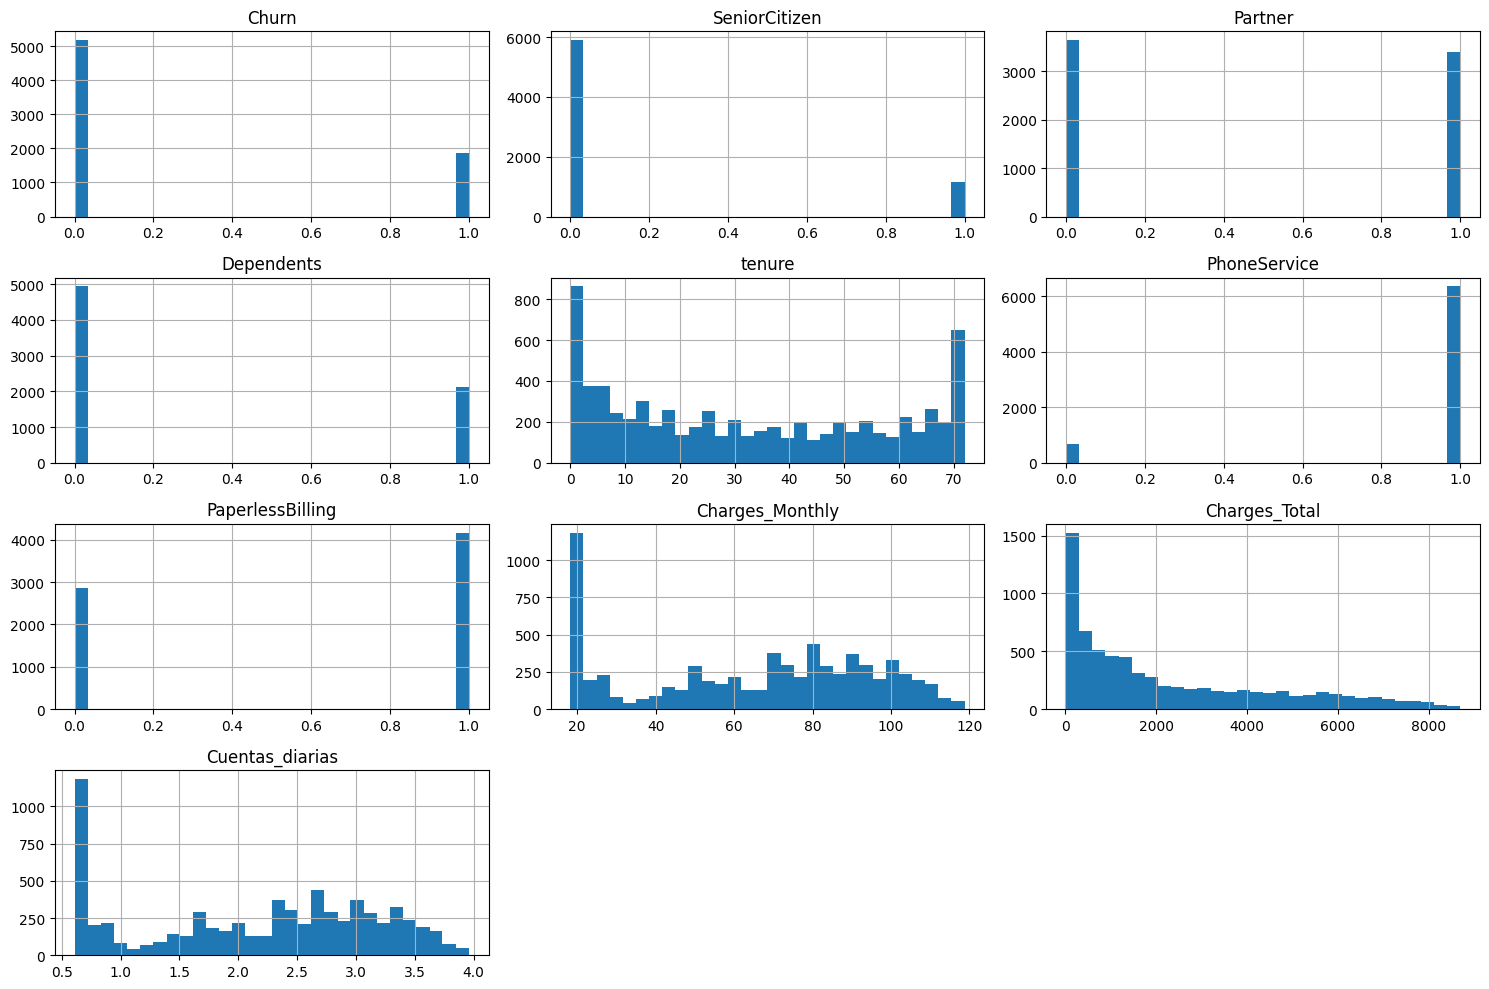

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

df_clientes[numericas].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


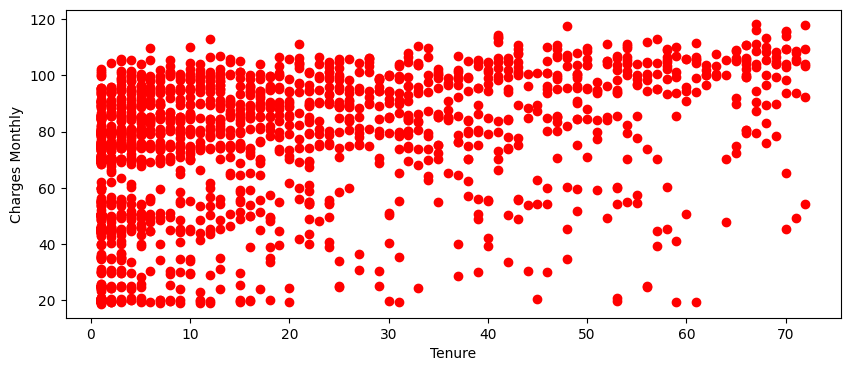

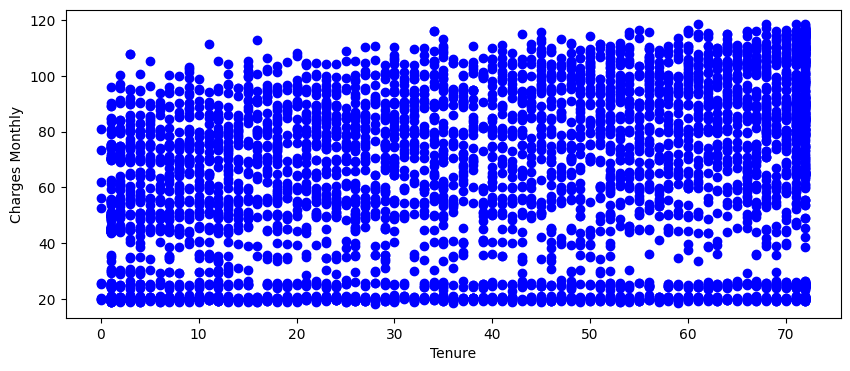

In [37]:
clientes_churn = df_clientes[df_clientes['Churn'] == 1]
clientes_no_churn = df_clientes[df_clientes['Churn'] == 0]


plt.figure(figsize=(10, 4))
plt.plot(clientes_churn['tenure'], clientes_churn['Charges_Monthly'], 'ro', label='Churn')
plt.xlabel('Tenure')
plt.ylabel('Charges Monthly')
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(clientes_no_churn['tenure'], clientes_no_churn['Charges_Monthly'], 'bo', label='No Churn')
plt.xlabel('Tenure')
plt.ylabel('Charges Monthly')
plt.show()

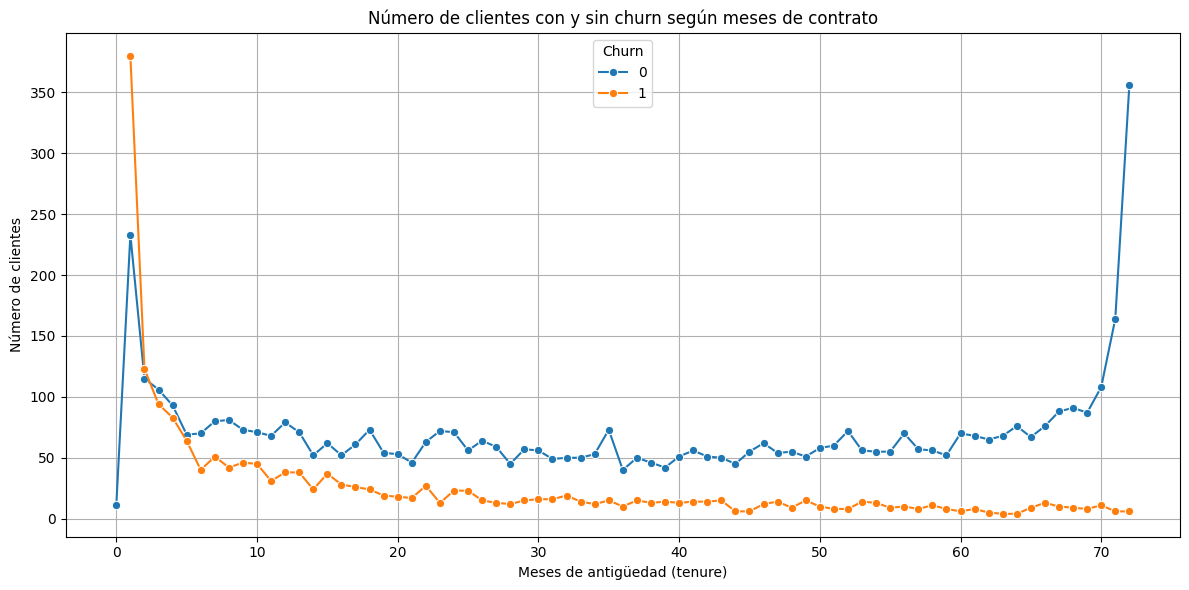

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por tenure y churn
churn_por_tenure = df_clientes.groupby(['tenure', 'Churn']).size().reset_index(name='conteo')

# Gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=churn_por_tenure, x='tenure', y='conteo', hue='Churn', marker='o')
plt.title('Número de clientes con y sin churn según meses de contrato')
plt.xlabel('Meses de antigüedad (tenure)')
plt.ylabel('Número de clientes')
plt.grid(True)
plt.tight_layout()
plt.show()


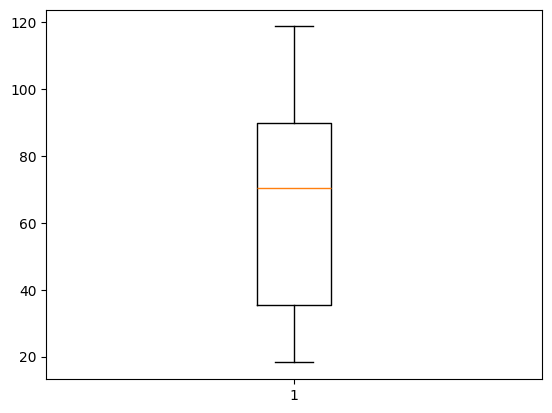

In [39]:
plt.boxplot(df_clientes['Charges_Monthly'])
plt.show()

In [40]:

categoricas.remove('customerID')

categoricas


['gender',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

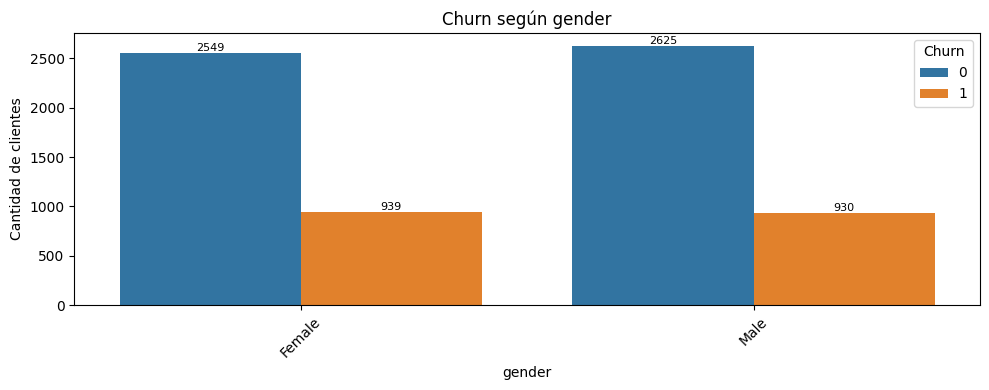

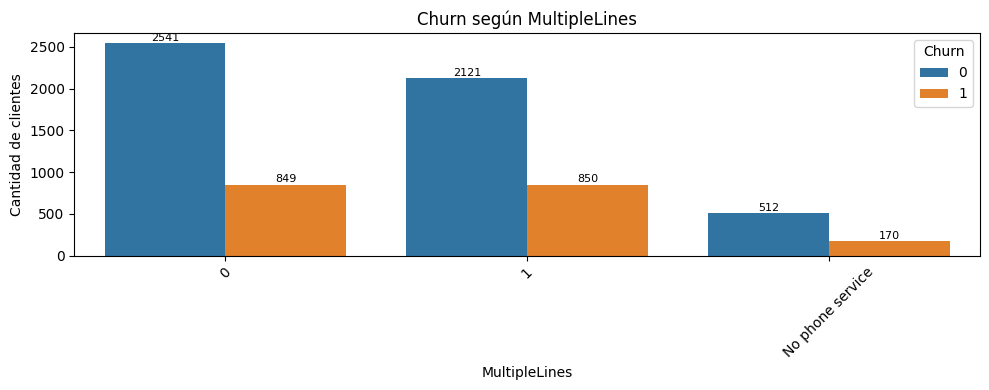

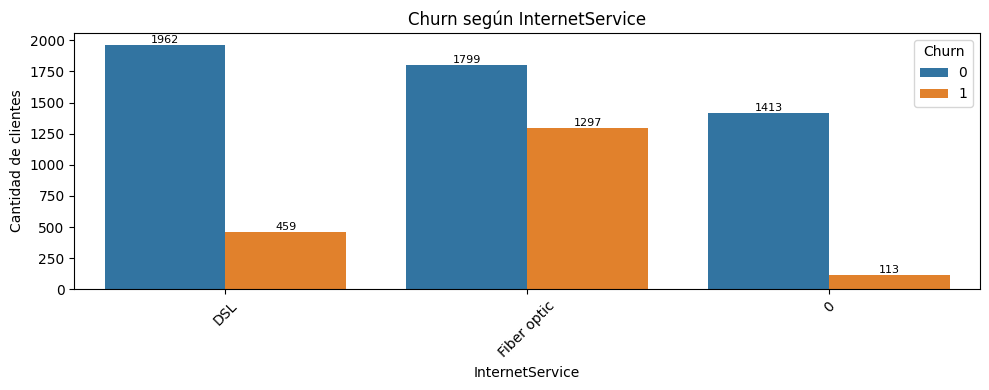

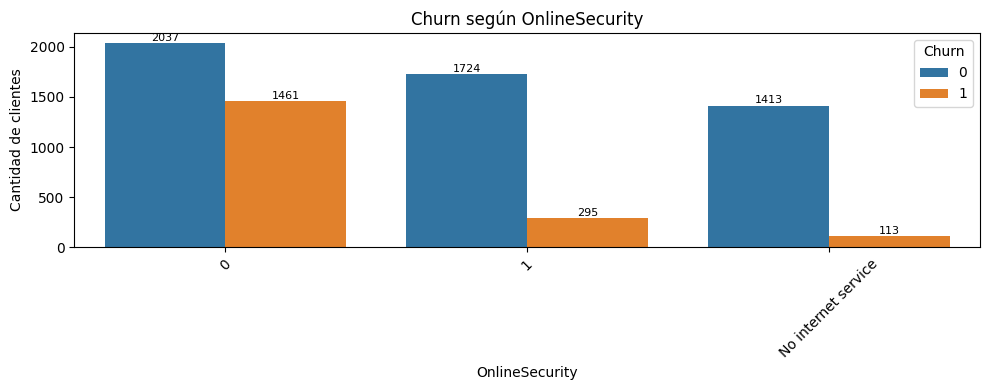

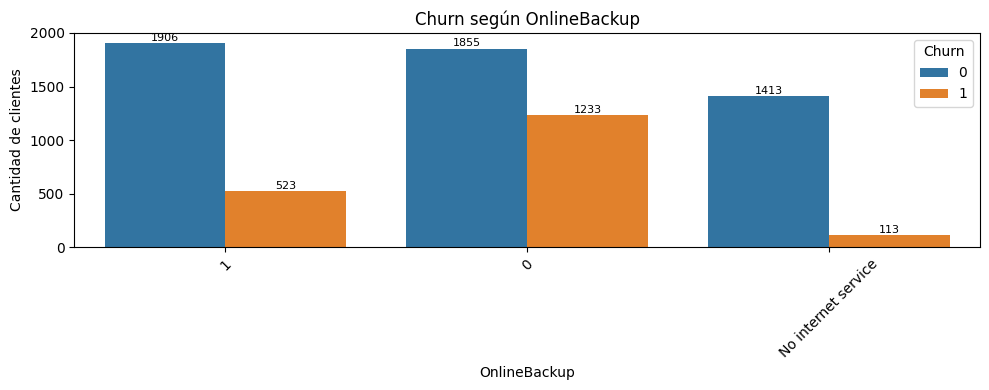

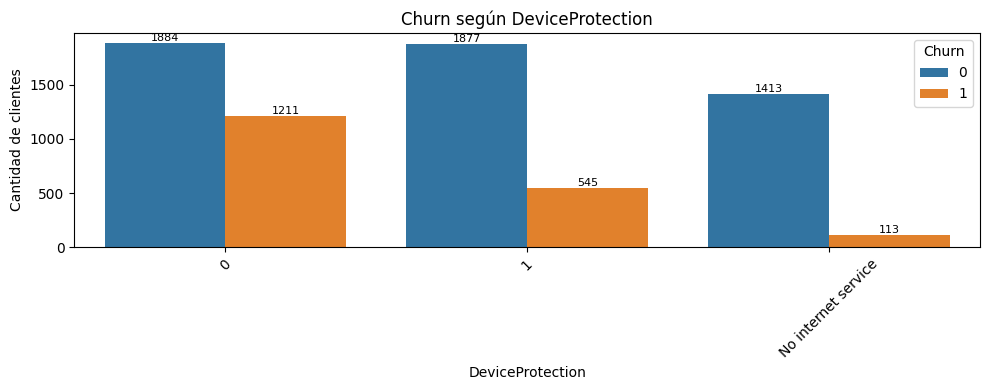

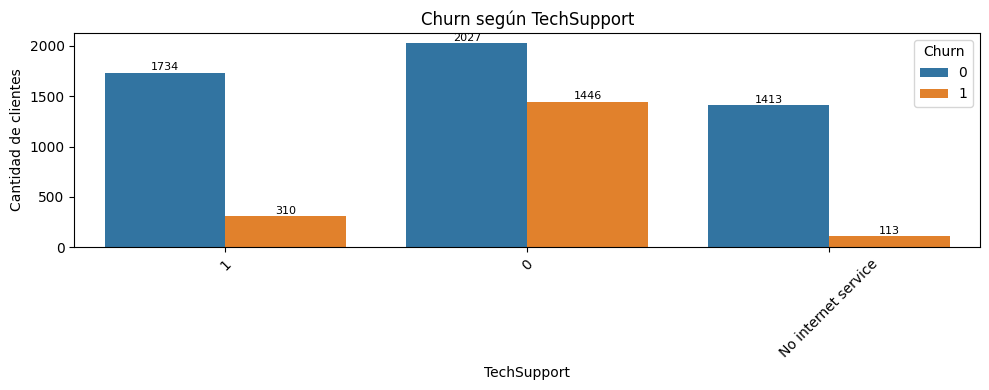

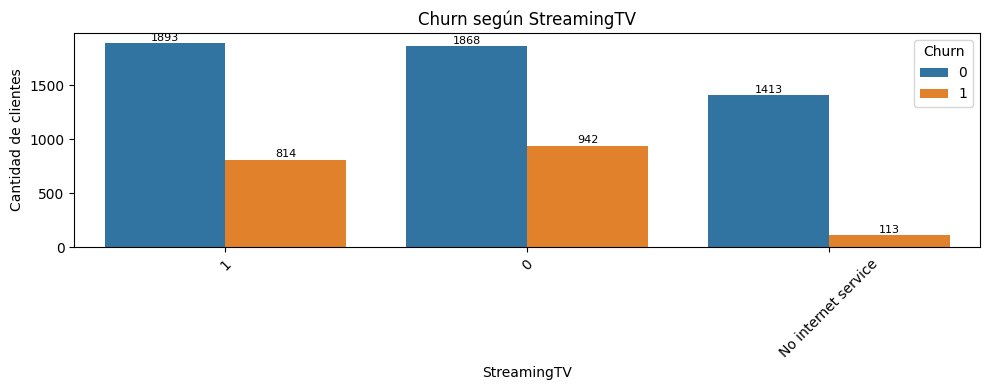

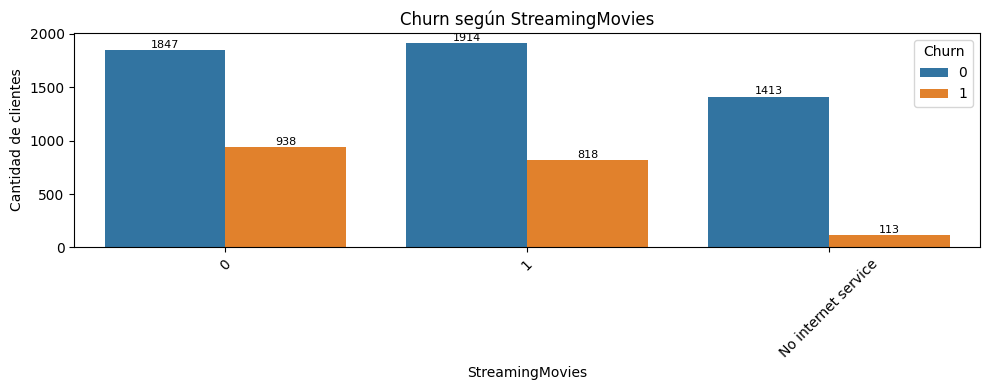

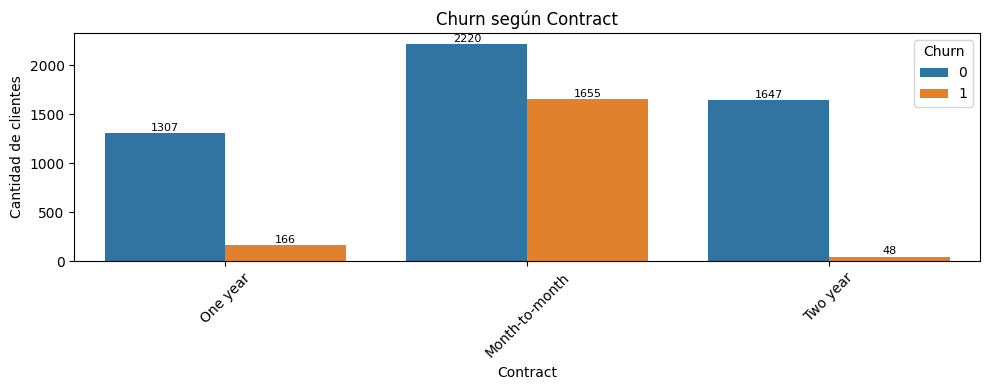

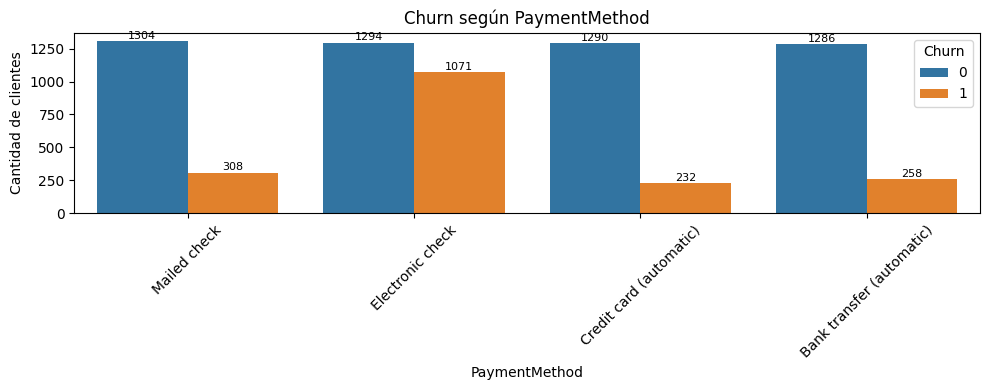

In [41]:
for col in categoricas:
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(data=df_clientes, x=col, hue='Churn')
    plt.title(f'Churn según {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad de clientes')
    plt.xticks(rotation=45)

    # Añadir etiquetas encima de las barras
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                x=p.get_x() + p.get_width() / 2,
                y=height + 2,
                s=int(height),
                ha='center',
                va='bottom',
                fontsize=8
            )

    plt.tight_layout()
    plt.show()


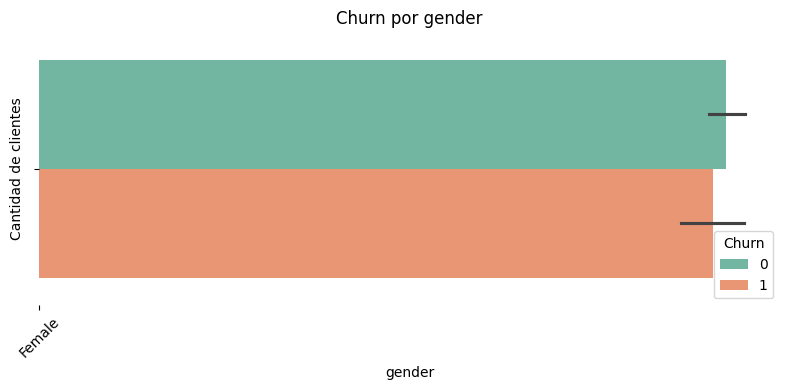

In [42]:
def generar_grafico(palette, data, hue, col):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.set_frame_on(False)

    sns.barplot(
        data=data,
        x=col,
        hue=hue,
        y=None,  # 'y' no se usa en gráficos de barras verticales con conteo implícito
        palette=palette,
        ax=ax
    )

    ax.set_title(f'Churn por {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Cantidad de clientes')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title=hue)
    plt.tight_layout()
    plt.show()

generar_grafico('Set2', df_clientes, 'Churn', 'gender')


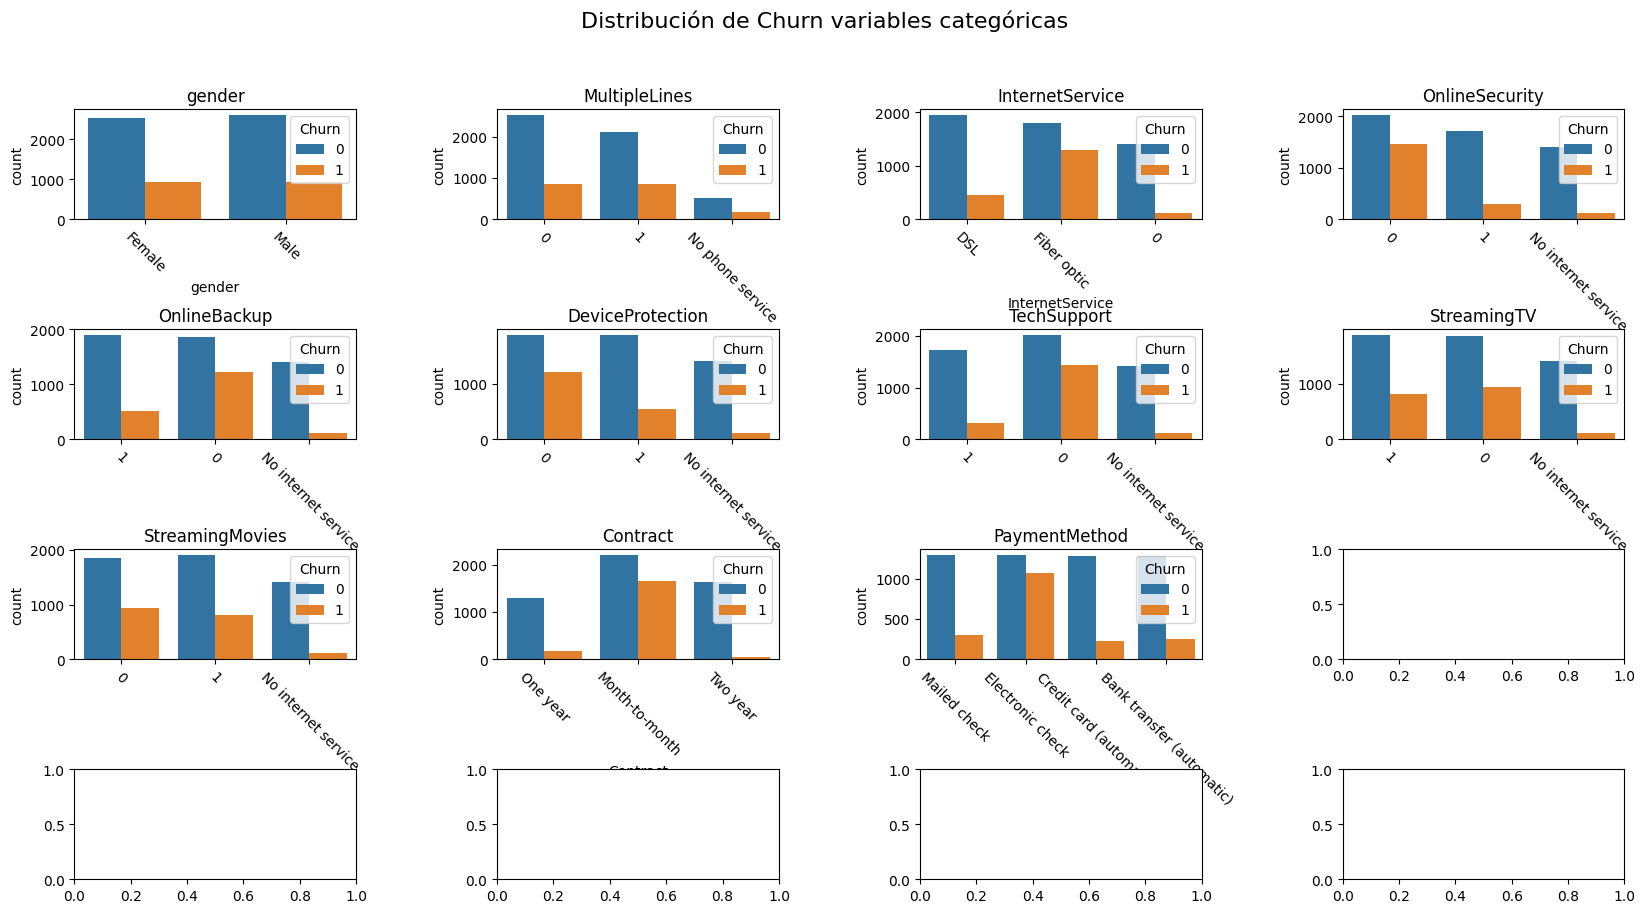

In [43]:
fig, axs = plt.subplots(4, 4, figsize=(20, 10))
fig.subplots_adjust(hspace=1, wspace=.5)
fig.suptitle('Distribución de Churn variables categóricas', fontsize=16)

for i, col in enumerate(categoricas):
    row = i // 4
    col_idx = i % 4
    ax = axs[row, col_idx]
    sns.countplot(data=df_clientes, x=col, hue='Churn', ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=-45)

plt.show()


In [44]:
df_clientes.value_counts('Churn')

,count
Churn,
0,5174
1,1869


In [45]:
(df_clientes['Churn'] == 1).sum().sum()

np.int64(1869)

In [46]:
df_clientes.groupby('Churn').size()


,0
Churn,
0,5174
1,1869


### Correlaciones Numéricas

In [47]:
df_clientes.groupby('Churn')["Cuentas_diarias"].mean()

,Cuentas_diarias
Churn,
0,2.042180
1,2.481385


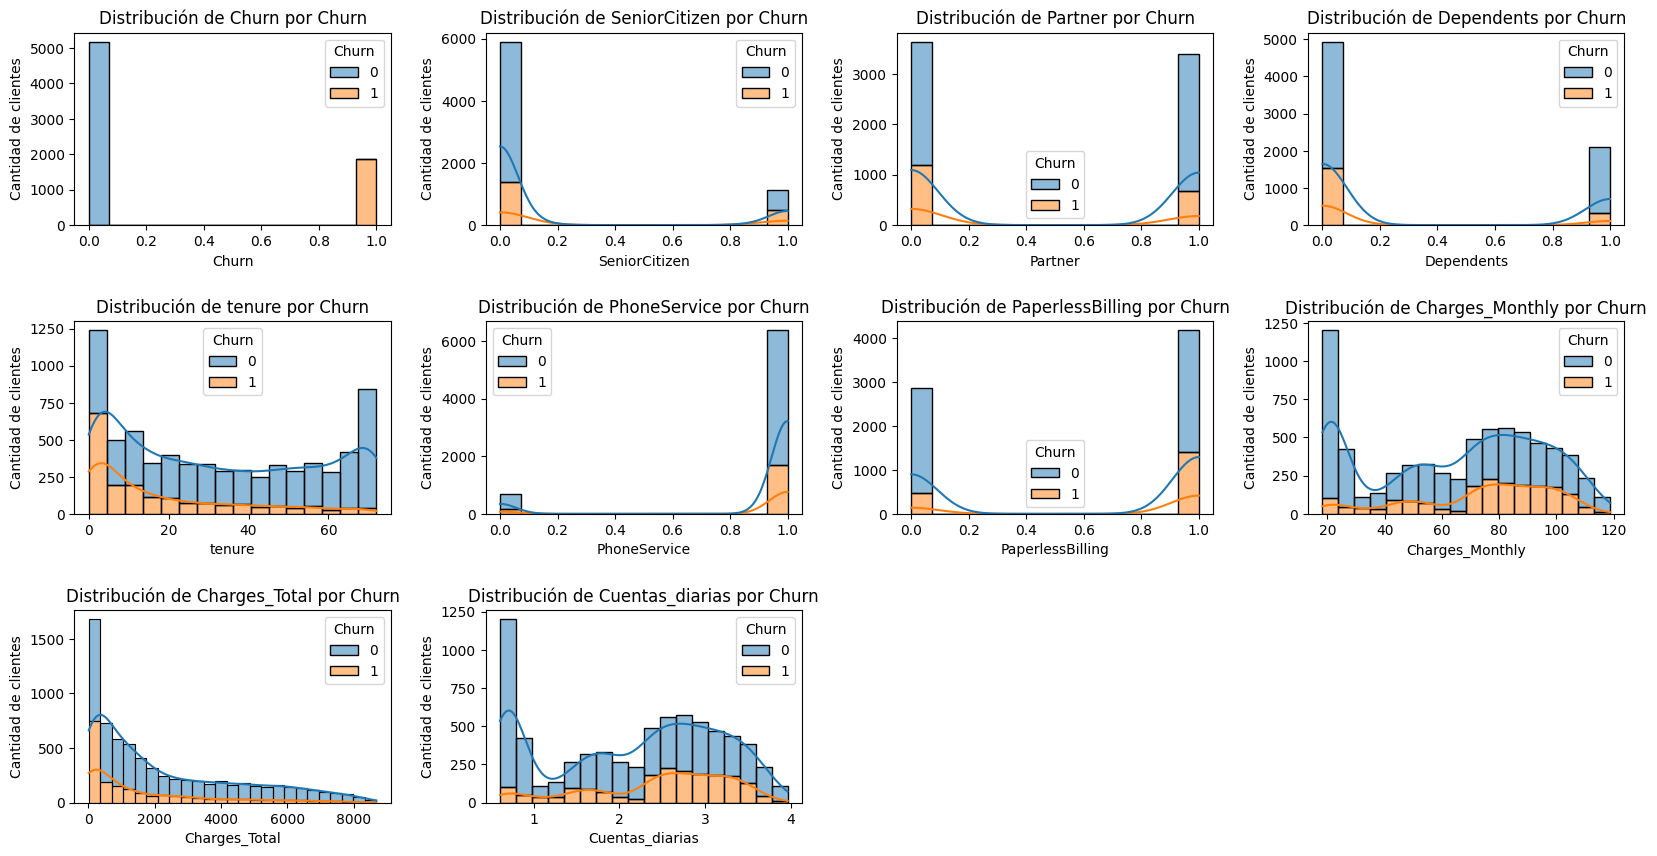

In [48]:


fig, axs = plt.subplots(3, 4, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, col in enumerate(numericas):
  # Histograma para Cuentas_diarias segmentado por Churn
  row = i // 4;
  col_idx = i % 4;
  sns.histplot(data=df_clientes, x=col, hue='Churn', ax=axs[row,col_idx], kde=True, multiple='stack')
  axs[row,col_idx].set_title(f'Distribución de {col} por Churn')
  axs[row,col_idx].set_xlabel(col)
  axs[row,col_idx].set_ylabel('Cantidad de clientes')


# Apagar subplots vacíos
total_graficos = len(numericas)
total_axs = 3 * 4

for j in range(total_graficos, total_axs):
    row = j // 4
    col_idx = j % 4
    axs[row, col_idx].axis('off')

plt.show()


In [50]:
numericas

['Churn',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'PaperlessBilling',
 'Charges_Monthly',
 'Charges_Total',
 'Cuentas_diarias']


# 📊 Informe Final del Análisis de Evasión de Clientes (Churn)

## 🔹 Introducción

El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes (churn) en una empresa de telecomunicaciones. El churn representa la pérdida de clientes, un problema crítico en industrias altamente competitivas. Al identificar los patrones detrás de esta conducta, se pueden desarrollar estrategias más eficaces para retener a los usuarios.

## 🔹 Limpieza y Tratamiento de Datos

Se realizaron los siguientes pasos para preparar los datos:

- **Importación** del dataset original en formato `.csv`.
- **Revisión y tratamiento de valores nulos**: se detectaron y corrigieron datos faltantes.
- **Conversión de tipos de datos**, asegurando que campos como fechas, booleanos y categorías fueran correctamente representados.
- **Creación de variables relevantes**, como `TotalCharges`, `MonthlyCharges`, `tenure`, etc.
- **Codificación de variables categóricas** para uso en modelos y visualizaciones.

## 🔹 Análisis Exploratorio de Datos

Se realizaron diversos análisis para identificar tendencias y patrones:

- **Distribución de Churn**: Se identificó una tasa significativa de clientes que abandonan el servicio.
- **Tenure vs Churn**: Los clientes con menor antigüedad (`tenure`) presentan una mayor tasa de churn.
- **Gasto mensual**: Clientes con altos `MonthlyCharges` tienen mayor propensión a irse.
- **Método de pago**: El churn es más elevado entre usuarios que pagan con tarjeta de crédito o débito automático.
- **Servicios contratados**: La ausencia de servicios como Internet o TV también se relaciona con menor churn, probablemente porque son clientes con menos compromiso con la empresa.

Se utilizaron gráficos como histogramas, diagramas de caja (boxplots) y gráficos de barras para visualizar estos patrones de manera clara.

## 🔹 Conclusiones e Insights

- **Antigüedad del cliente** es un factor crítico: los clientes nuevos tienden a abandonar más.
- **El gasto mensual elevado** puede ser una señal de insatisfacción cuando no se percibe valor equivalente.
- **Los métodos de pago automáticos** se asocian con mayor churn, posiblemente por menor compromiso consciente del cliente.
- **Los usuarios con servicios mínimos** tienen menos retención, lo que sugiere que vender paquetes integrales podría mejorar la fidelización.

## 🔹 Recomendaciones

- 🎯 **Programas de fidelización temprana**: Crear beneficios exclusivos para clientes nuevos dentro de los primeros 6 meses.
- 💳 **Revisar estrategias de cobro automático**: Mejorar la comunicación y experiencia del usuario en estos métodos.
- 💡 **Promocionar paquetes integrales**: Incentivar la contratación de múltiples servicios (Internet, TV, Telefonía).
- 📞 **Mejorar el soporte a clientes con altos cargos mensuales**: Identificar insatisfacción temprana en clientes premium.
- 🧠 **Modelos predictivos de churn**: Implementar modelos que alerten sobre clientes en riesgo para intervención proactiva.

Este análisis puede servir como base para iniciativas estratégicas enfocadas en la retención y crecimiento de clientes.
